## Advanced Regression Assignment - Part I
###  Background: 
#### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

#### The company wants to know:
#### Which variables are significant in predicting the price of a house, and How well those variables describe the price of a house. Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal:

#### You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Solution Approach:
#### 1). Data understanding and exploration 2). Data cleaning and preparation 3). Model building and evaluation 4). Observation and inference

In [47]:
# Importing required python libraries
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [48]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 1). Data understanding and exploration

In [49]:
# Reading the dataset
housing = pd.read_csv(r"C:\Users\Binoj\Desktop\USHousingAU_TrainDataset.csv", encoding = 'utf-8')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
# Displays information about the DataFrame
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [51]:
# Returns the statistical summary of the dataset
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [52]:
# Displays the no of elements in the dataset
housing.shape

(1460, 81)

In [53]:
# Displays percentage nulls
round(100*(housing.isnull().sum()/len(housing.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

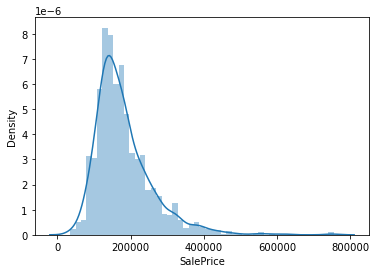

In [54]:
# Visualizing the distribution of 'SalePrice'
sns.distplot(housing['SalePrice'])

### 2). Data cleaning and preparation

In [55]:
# Dropping'Id' as it's just an identifier and not useful in prediction
housing.drop('Id', axis = 1, inplace = True)
print(housing.shape)

(1460, 80)


In [56]:
# Dropping 'Alley', 'PoolQC', 'Fence', and 'MiscFeature' columns with very high nan values
housing_postdrop = housing.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)
print('Shape of Orginal df:', housing.shape)
print('Shape after performing drop:', housing_postdrop.shape)

Shape of Orginal df: (1460, 80)
Shape after performing drop: (1460, 76)


In [57]:
# Displaying numerical and non-numerical columns in the dataset
NonNumCols = []
NumCols = []
for col in list(housing_postdrop):
    if housing_postdrop[col].dtypes == 'object':
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
print('Non-Numerical cols:\n',NonNumCols)
print('Numerical cols:\n',NumCols)

Non-Numerical cols:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical cols:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPor

In [58]:
# Displays missing values
housing_postdrop.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [59]:
# Replacing null values in'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' as there's no garage
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    housing_postdrop[col].fillna('No Garage', inplace=True)

In [60]:
# Replacing the null values in 'FireplaceQu' with'No Fireplace'
housing_postdrop['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [61]:
# Replacing the null values in 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond' as there is 'No Basement'
for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    housing_postdrop[col].fillna('No Basement', inplace=True)

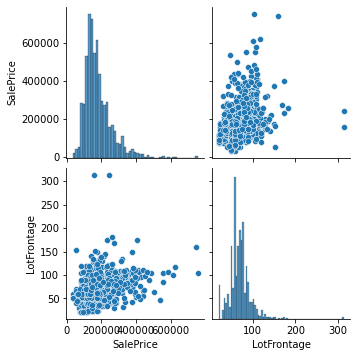

In [62]:
# Paiplot to view the relationship between 'SalePrice' and 'LotFrontage'
sns.pairplot(housing_postdrop[['SalePrice','LotFrontage']])

In [63]:
# Replacing missing values of 'LotFrontage' with Median as we observe a positively Skewed Distribution
housing_postdrop.loc[:,'LotFrontage'] = housing_postdrop.loc[:, 'LotFrontage'].fillna(housing_postdrop['LotFrontage'].median())

In [64]:
# Modifies the existing data frame
housing_postdrop.dropna(inplace = True)

In [65]:
# Returns the number of missing values in the data set
housing_postdrop.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

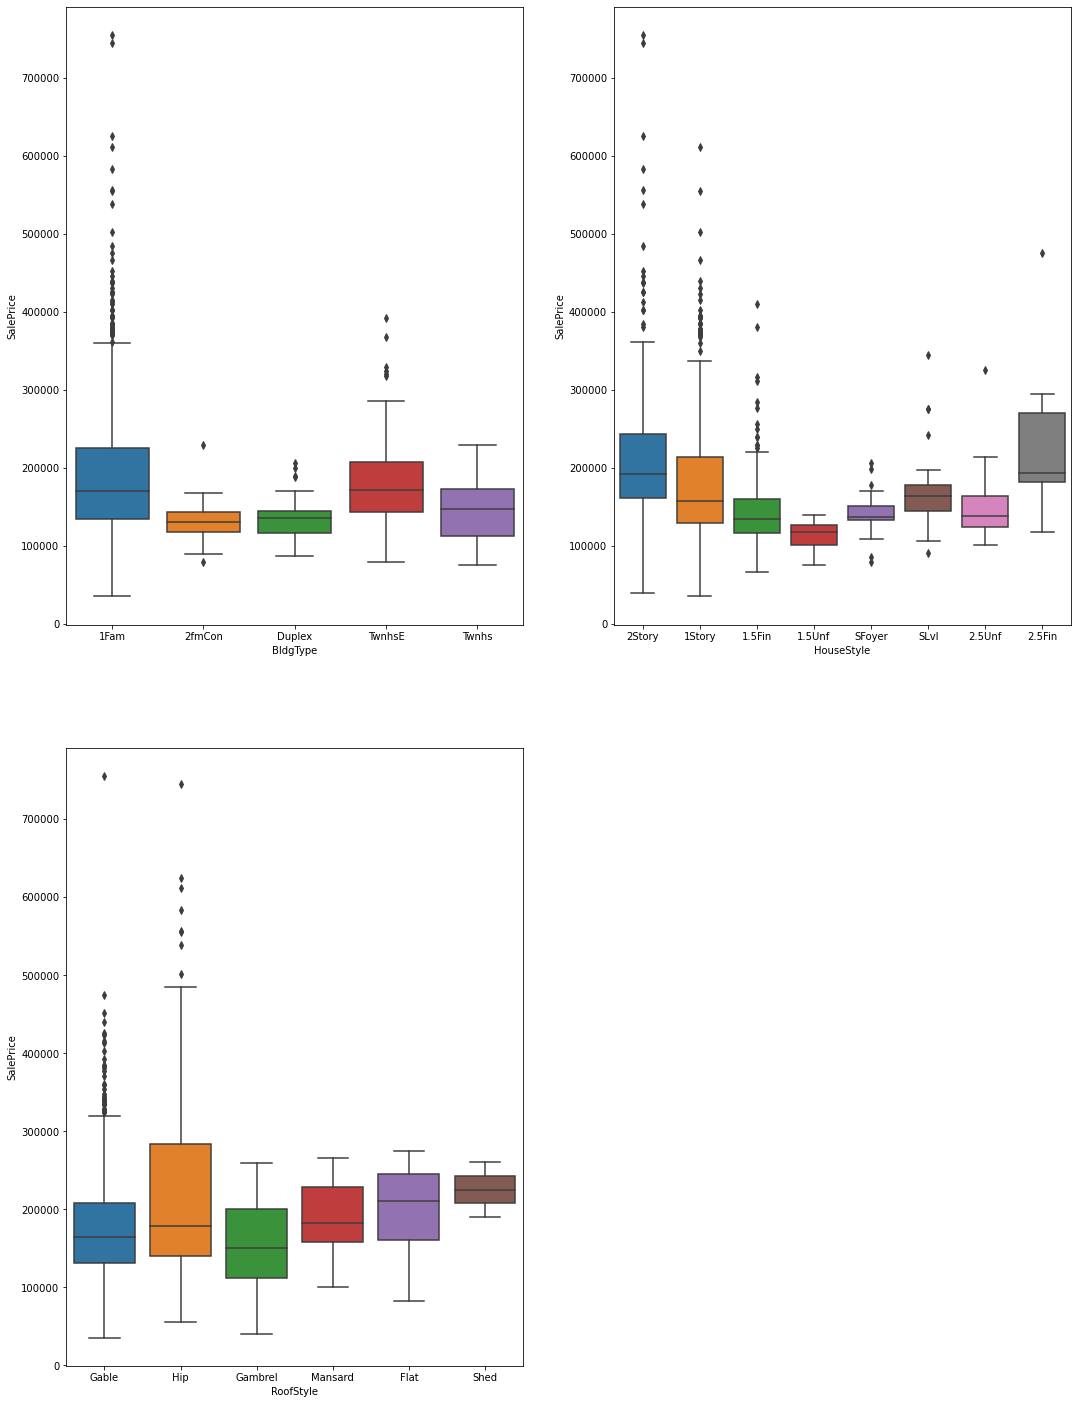

In [66]:
# Visualization thru' boxplot on how parameters 'BldgType','HouseStyle','RoofStyle' affect the 'SalePrice'
plt.figure(figsize=(18, 25))
plt.subplot(2,2,1)
sns.boxplot(x ='BldgType', y ='SalePrice', data = housing_postdrop)

plt.subplot(2,2,2)
sns.boxplot(x ='HouseStyle', y ='SalePrice', data = housing_postdrop)

plt.subplot(2,2,3)
sns.boxplot(x ='RoofStyle', y ='SalePrice', data = housing_postdrop)

#### Observation: We observe from the above boxplot that single-family detached(1Fam), two story(2Story) under HouseStyle and Hip styled roofs fetch the higest saleprice

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Timber'),
  Text(16, 0, 'Gilbert'),
  Text(17, 0, 'StoneBr'),
  Text(18, 0, 'ClearCr'),
  Text(19, 0, 'Edwards'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

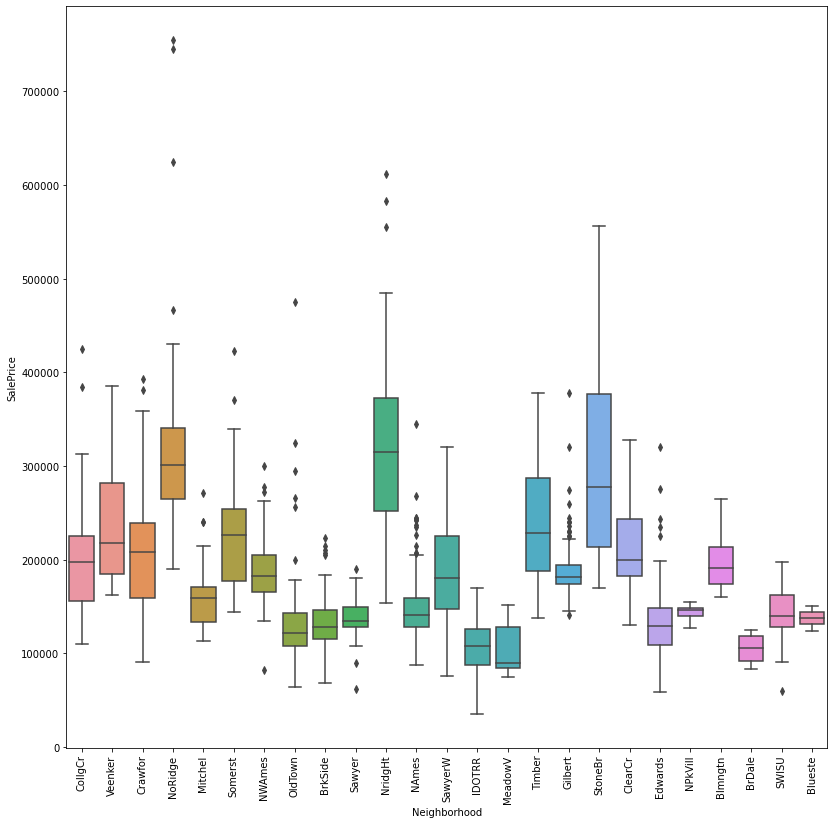

In [67]:
#Visualization thru' boxplot 'Neighborhood' vs 'SalePrice'
plt.figure(figsize=(30, 30))
plt.subplot(2,2,1)
sns.boxplot(x ='Neighborhood', y ='SalePrice', data = housing_postdrop)
plt.xticks(rotation=90)

 #### Observation: It's observed that neighorhood 'NridgHt'- Northridge Heights, 'NoRidge' - Northridge and 'StoneBr'-Stone Brook the SalePrice is highest when compared to other neighborhoods.

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

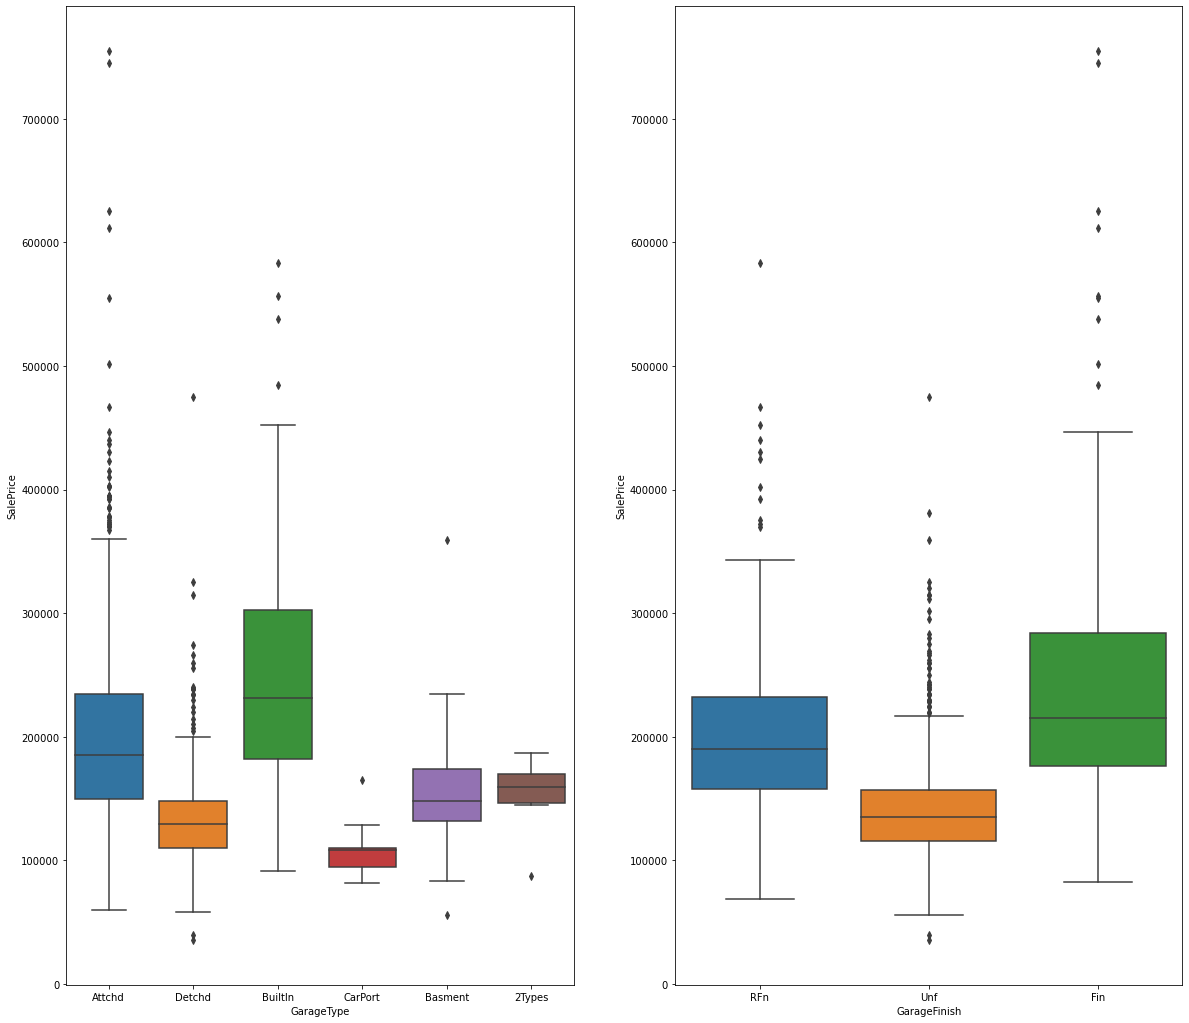

In [68]:
# Visualizing thru' boxplot 'GarageType' and 'GarageFinish' on SalePrice

plt.figure(figsize=(20, 18))
plt.subplot(1,2,1)
sns.boxplot(x = 'GarageType', y ='SalePrice', data = housing_postdrop)
plt.subplot(1,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = housing_postdrop)

#### Observation: It's observed that for 'GarageType' houses with Built-In (Garage part of house - typically has room above garage) fetches higher SalePrice and houses with Garage Finished(Fin) has higher SalePrice.

In [69]:
# Computing the pairwise correlation
cor = housing_postdrop.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.355731,-0.134249,0.052488,-0.099187,0.060179,0.036852,0.034038,-0.067319,-0.079750,-0.136682,-0.240464,-0.251857,0.307615,0.020123,0.074968,-0.010733,0.000340,0.128989,0.196234,-0.056691,0.247696,0.023840,-0.024609,0.085528,0.012643,-0.065689,-0.009248,-0.000714,-0.020429,-0.044149,-0.022004,0.010263,-0.022066,-0.016930,-0.023277,-0.076093
LotFrontage,-0.355731,1.000000,0.299232,0.225650,-0.042514,0.103349,0.081258,0.176204,0.220671,0.041284,0.109034,0.359321,0.408413,0.067589,0.011054,0.361018,0.104684,-0.000577,0.169066,0.039331,0.240901,-0.001828,0.315991,0.227425,0.066050,0.269440,0.332654,0.068921,0.144175,0.013937,0.061463,0.032769,0.185681,-0.001987,0.017238,0.011263,0.327706
LotArea,-0.134249,0.299232,1.000000,0.090561,0.000630,-0.004303,0.004292,0.096287,0.209134,0.110495,-0.011411,0.250562,0.287870,0.048299,0.010282,0.255214,0.160638,0.046781,0.113466,0.007916,0.117700,-0.020503,0.183614,0.263352,-0.024055,0.137891,0.168110,0.168086,0.086727,-0.018401,0.018578,0.038919,0.077075,0.040437,0.001501,-0.012456,0.253784
OverallQual,0.052488,0.225650,0.090561,1.000000,-0.135684,0.572148,0.557872,0.402906,0.220260,-0.072343,0.320010,0.530981,0.467898,0.289875,-0.014204,0.591248,0.105865,-0.056204,0.559064,0.263904,0.086365,-0.174081,0.430584,0.383704,0.547677,0.580609,0.526230,0.229108,0.313148,-0.105743,0.024900,0.051929,0.064873,-0.028867,0.062848,-0.016776,0.786304
OverallCond,-0.099187,-0.042514,0.000630,-0.135684,1.000000,-0.404519,0.050065,-0.135522,-0.046687,0.037662,-0.141073,-0.178769,-0.141934,0.015260,0.042908,-0.089057,-0.058479,0.120999,-0.214357,-0.062604,0.016542,-0.094549,-0.066807,-0.023050,-0.323979,-0.246861,-0.197039,-0.007034,-0.052030,0.067900,0.026310,0.056516,-0.002577,0.078957,-0.011398,0.049851,-0.093986
YearBuilt,0.060179,0.103349,-0.004303,0.572148,-0.404519,1.000000,0.615631,0.303387,0.230457,-0.065166,0.158860,0.380151,0.262121,0.015944,-0.159294,0.195597,0.181121,-0.052806,0.484218,0.232678,-0.069712,-0.163777,0.103557,0.117073,0.824502,0.523370,0.445363,0.215284,0.218063,-0.377951,0.027096,-0.068034,0.001593,-0.033503,0.005791,-0.007784,0.508127
YearRemodAdd,0.036852,0.081258,0.004292,0.557872,0.050065,0.615631,1.000000,0.174880,0.114723,-0.076512,0.190135,0.285783,0.238492,0.127960,-0.063057,0.280294,0.111787,-0.019348,0.445916,0.179199,-0.065355,-0.172761,0.175683,0.104119,0.640097,0.450286,0.382366,0.206268,0.233628,-0.209119,0.044501,-0.046775,0.004475,-0.002848,0.014395,0.039436,0.506063
MasVnrArea,0.034038,0.176204,0.096287,0.402906,-0.135522,0.303387,0.174880,1.000000,0.257041,-0.078309,0.113705,0.357156,0.336612,0.174101,-0.061132,0.392269,0.084947,0.017414,0.273193,0.196299,0.108914,-0.018553,0.286751,0.235708,0.253348,0.363691,0.368737,0.150905,0.129953,-0.105202,0.015478,0.054039,0.009768,-0.029603,-0.010454,-0.004663,0.468055
BsmtFinSF1,-0.067319,0.220671,0.209134,0.220260,-0.046687,0.230457,0.114723,0.257041,1.000000,-0.054371,-0.504356,0.519022,0.443545,-0.141121,-0.049956,0.205781,0.645230,0.061895,0.042005,-0.009069,-0.116248,-0.072388,0.044434,0.251658,0.153196,0.200271,0.287389,0.195878,0.115770,-0.100533,0.024378,0.057334,0.142512,0.007135,-0.018182,0.020516,0.373057
BsmtFinSF2,-0.079750,0.041284,0.110495,-0.072343,0.037662,-0.065166,-0.076512,-0.078309,-0.054371,1.000000,-0.215117,0.101798,0.095537,-0.106885,0.007257,-0.018991,0.160881,0.073707,-0.088458,-0.034687,-0.007987,-0.037438,-0.041136,0.039543,-0.086518,-0.074640,-0.046937,0.062967,0.006021,0.045598,-0.031683,0.086843,0.041346,0.005890,-0.018814,0.032913,-0.022302


<AxesSubplot:>

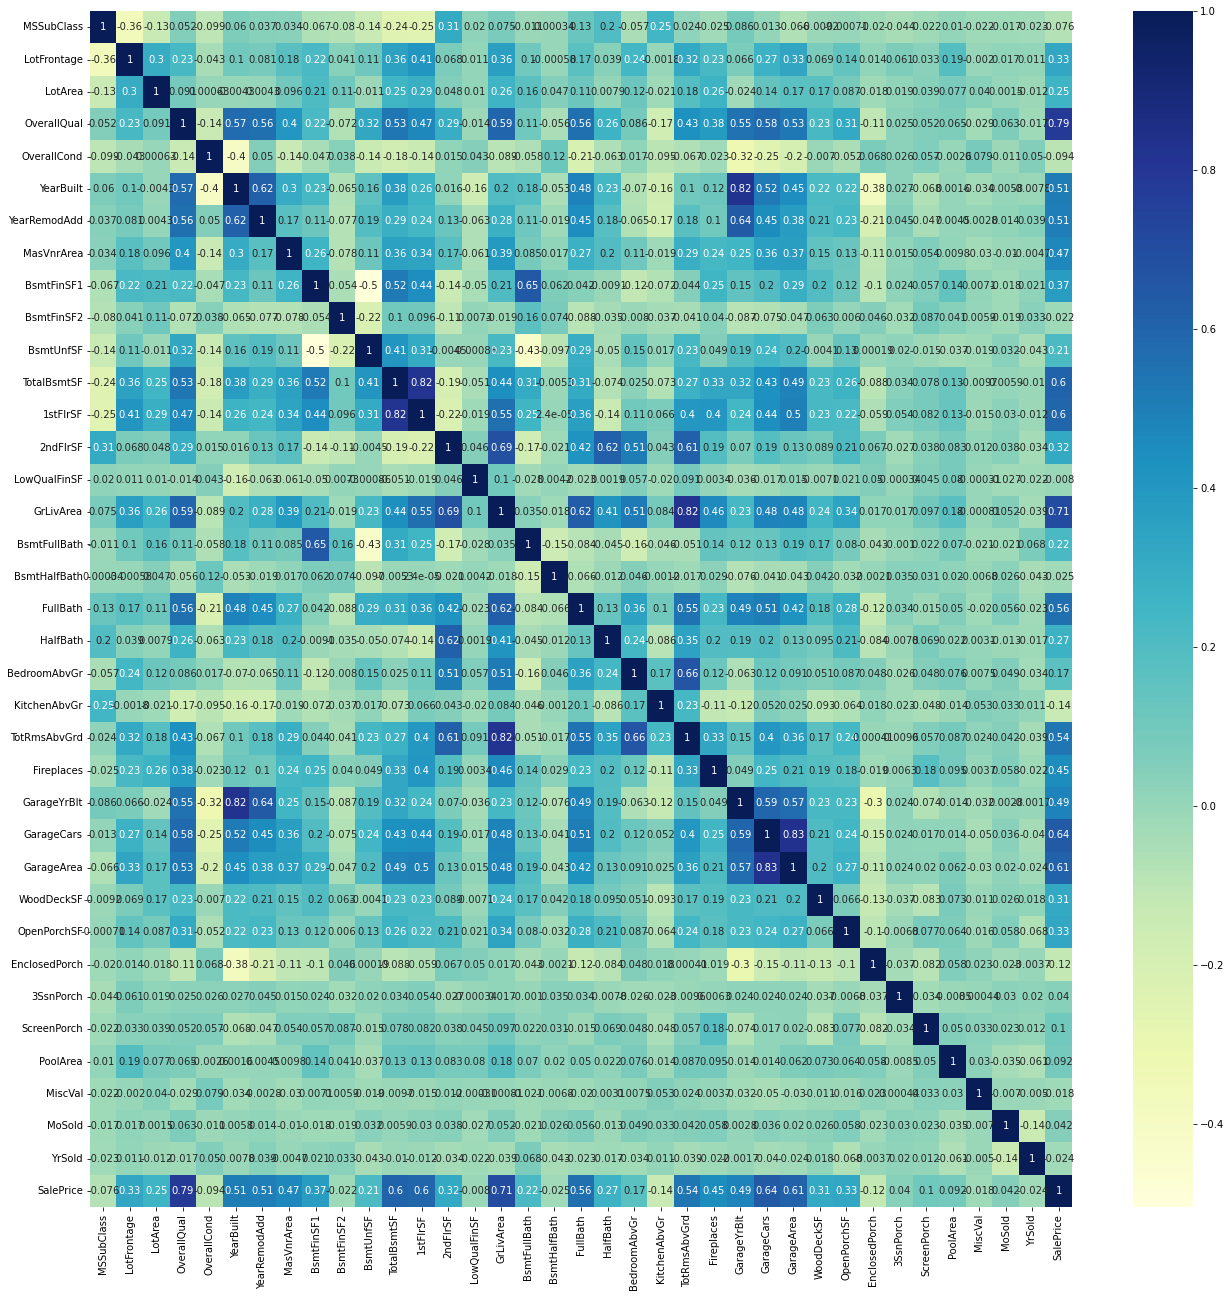

In [70]:
# Visualizing the correlation thru' a heatmap
plt.figure(figsize=(22, 22))
sns.heatmap(housing_postdrop.corr(), cmap="YlGnBu", annot = True)

In [71]:
# Alternatively identifying the highly correlated variables as heatmap looks cluttered
# Reference - https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
corr_matrix = housing_postdrop.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.80)]
col_to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']

In [72]:
# Dropping '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'
housing_postdrop.drop(housing_postdrop[col_to_drop], axis=1, inplace = True)
# Viewing the no of elements after dropping '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'
housing_postdrop.shape

(1370, 72)

In [73]:
# Displaying the list of numerical and non-numerical columns
NonNumCols = []
NumCols = []
for col in list(housing_postdrop):
    if housing_postdrop[col].dtypes == 'object':
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
print('Non-Numerical cols:\n',NonNumCols)
print('Numerical cols:\n',NumCols)

Non-Numerical cols:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical cols:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', '

#### Creating Dummy variables

In [74]:
# Get dummies for all other categorical variables
housing_dummy = pd.get_dummies(housing_postdrop[NonNumCols], drop_first=True)

In [75]:
# Concatenating the dataframe 'housing_postdrop' with dummies
housing_concat = pd.concat([housing_postdrop, housing_dummy], axis=1)
# Viewing the no of elements after concatenation 
housing_concat.shape

(1370, 276)

In [76]:
# Drop original columns from where dummies were derived
housing_final = housing_concat.drop(NonNumCols, axis = 1)
# Viewing the no of elements again
housing_final.shape

(1370, 237)

#### Test-Train Split

In [77]:
# Train-Test Splitting
X = housing_final.drop('SalePrice', axis=1)
y = housing_final['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (958, 236)
X_test Shape: (411, 236)
y_train Shape: (958,)
y_test Shape: (411,)


In [78]:
# Displaying X_train
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
178,20,63.0,17423,9,5,2008,2009,748.0,1904,0,312,2216,0,0,2234,1,0,2,0,1,1,1,3,0,60,0,0,0,0,0,7,2009,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,

In [79]:
# Displaying y_train
y_train.head()

178     501837
1276    162000
770     134900
667     193500
1295    138500
Name: SalePrice, dtype: int64

#### Apply Scaling

In [80]:
# Applying scaling on numerical columns. fit_transform and displaying X_train
scaler = StandardScaler()
Num_Cols1 = NumCols.copy()
Num_Cols1.remove('SalePrice')
X_train[Num_Cols1] = scaler.fit_transform(X_train[Num_Cols1])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
178,-0.847579,-0.338160,0.551012,2.128794,-0.556706,1.217757,1.157585,3.532495,3.159126,-0.304297,-0.583079,2.531015,-0.785360,-0.093631,1.429837,1.126280,-0.253859,0.802405,-0.755609,-2.450656,-0.192132,0.5

In [81]:
# Display the X_test data after applying transform
X_test[Num_Cols1] = scaler.transform(X_test[Num_Cols1])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1142,0.122095,0.276310,-0.084173,1.375420,-0.556706,1.149412,1.059481,1.282122,1.522853,-0.304297,-0.574161,0.867266,2.402817,-0.093631,2.621935,1.126280,-0.253859,2.677293,-0.755609,1.506190,-0.192132,0.571

### 3). Model building and evaluation

#### Ridge Regression

In [82]:
# list of alphas for tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
# Displaying the mean scores
cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043801,0.065658,0.004186,0.001585,0.0001,{'alpha': 0.0001},-20583.475556,-19985.946047,-20496.234748,-18083.269771,-20366.478337,-19903.080892,932.532545,20,-11635.164472,-12292.587867,-11941.941818,-11940.000157,-12005.125083,-11962.963879,209.213408
1,0.012766,0.006320,0.004388,0.001018,0.001,{'alpha': 0.001},-20615.110775,-19981.883841,-20407.501601,-17997.704719,-20200.148629,-19840.469913,945.171269,17,-11636.286244,-12294.437560,-11941.715974,-11931.179425,-12007.069198,-11962.137680,209.760182
2,0.009576,0.001741,0.002989,0.000002,0.01,{'alpha': 0.01},-21016.875994,-19951.431034,-19762.007410,-17514.619695,-19364.258388,-19521.838504,1142.902164,13,-11735.524496,-12312.922667,-11996.780838,-11961.226313,-12143.019482,-12029.894759,192.544924
3,0.009974,0.003026,0.005982,0.005499,0.05,{'alpha': 0.05},-22397.900833,-19897.682831,-18977.309947,-17723.218981,-20245.477797,-19848.318078,1545.007850,19,-12499.571015,-12388.968880,-12635.041342,-12631.104204,-12920.566447,-12615.050378,178.014471
4,0.010373,0.001196,0.003789,0.000399,0.1,{'alpha': 0.1},-23041.909362,-19881.390721,-18692.978328,-18203.313293,-20745.793515,-20113.077044,1714.406333,24,-12984.891867,-12463.846482,-13230.647981,-13216.057962,-13445.698410,-13068.228540,335.541291


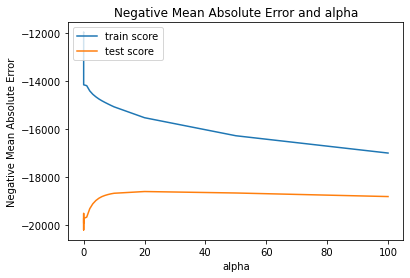

In [84]:
# Plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [85]:
# Gives the best estimator for alpha
ridge_model_cv.best_estimator_

Ridge(alpha=20)

In [86]:
# Ridge regression - coefficient values with alpha = 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ -6941.2641651 ,  -3049.23373766,   5714.30873172,  16969.09049036,
         5315.48988977,   4155.70010996,   2349.35621825,   3850.16299971,
          795.61978817,    639.89054505,    -33.3841818 ,   1028.51069189,
         2277.12101518,   1199.22325429,  20957.69971603,   4478.99026175,
         -673.44342004,   5610.4591629 ,   3121.93216624,   -678.96832702,
        -2308.07191337,   1075.10076511,   8410.60630409,   3119.5377207 ,
          230.16599185,   1634.57011673,    148.48209582,   3018.01383631,
        -3793.0967286 ,   -554.69969314,   -559.29808962,   -430.58203217,
         2498.92526593,   1213.0319346 ,   4408.28116786,  -4355.2027471 ,
         6930.86951591,   4957.95414708,  -8445.43907161,  -2049.26935709,
         7370.52523475,  -1352.88758776,   6909.35152364,  -1970.85398428,
        10014.97034065,  -5461.5269587 ,  -1430.81694809,   1673.98912826,
         1542.87809413,  -5611.89973975,   -240.10762185,   1719.27949022,
         4193.83255137,  

#### Lasso Regression

In [87]:
# Checking the dimension of X_train and y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (958, 236)
y_train (958,)


In [88]:
# Applying Lasso:

lasso = Lasso()

# cross validation

lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.194047,0.093731,0.003989,0.001262,0.0001,{'alpha': 0.0001},-20858.068225,-20095.725816,-20898.100359,-18322.383148,-21530.300197,-20340.915549,1106.989494,27,-11632.500800,-12291.800958,-11944.955971,-11938.458993,-12006.528017,-11962.848948,209.839087
1,0.166161,0.015888,0.005579,0.001008,0.001,{'alpha': 0.001},-20865.187956,-20095.880179,-20893.992399,-18321.725769,-21529.933559,-20341.343973,1107.401298,28,-11632.491953,-12291.786863,-11944.937933,-11938.434914,-12006.505247,-11962.831382,209.837373
2,0.151794,0.019941,0.003592,0.000798,0.01,{'alpha': 0.01},-20864.513568,-20096.731677,-20837.471716,-18317.013144,-21526.187618,-20328.383544,1102.779601,26,-11632.525550,-12291.761581,-11944.788436,-11938.458367,-12006.527772,-11962.812341,209.821821
3,0.169550,0.017025,0.004388,0.001197,0.05,{'alpha': 0.05},-20816.270388,-20088.382213,-20661.607838,-18297.628036,-21509.778503,-20274.733396,1087.376929,25,-11632.885647,-12292.224769,-11944.665706,-11938.909842,-12006.940332,-11963.125259,209.862618
4,0.152990,0.026301,0.003192,0.000399,0.1,{'alpha': 0.1},-20810.227784,-20077.694671,-20456.107616,-18272.094203,-21489.602853,-20221.145425,1079.869278,23,-11633.340201,-12292.951976,-11944.592072,-11939.524635,-12007.451539,-11963.572085,209.956251


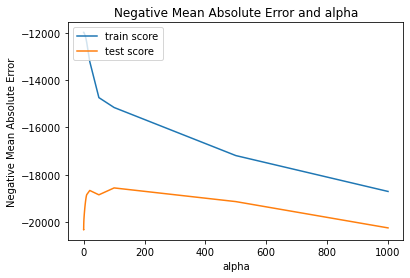

In [90]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [91]:
# Gives the best estimator for alpha
lasso_model_cv.best_estimator_

Lasso(alpha=100)

In [92]:
# Lasso regression - coefficient values with alpha =100
alpha = 100
lasso = Lasso(alpha=alpha)       
lasso.fit(X_train, y_train)
lasso.coef_

array([-7.58982034e+03, -3.33614587e+03,  5.85244424e+03,  1.52568525e+04,
        4.79048560e+03,  4.34702374e+03,  1.96557493e+03,  2.03722963e+03,
       -0.00000000e+00,  8.02459796e+01, -0.00000000e+00, -3.71069869e+02,
        0.00000000e+00,  1.00373073e+03,  2.32752660e+04,  4.68457376e+03,
       -3.10333059e+02,  5.35496209e+03,  2.82100002e+03, -3.96546856e+02,
       -3.12102611e+03,  8.10213462e+02,  8.23775287e+03,  2.94628445e+03,
        1.18739283e+02,  8.22312847e+02, -0.00000000e+00,  2.94677497e+03,
       -3.01087160e+03, -2.71139821e+02, -6.42844269e+02, -1.14795621e+02,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -4.39159163e+03,
        2.89682990e+04,  5.11805357e+03, -1.24565753e+04, -7.53313507e+02,
        9.70159186e+03, -0.00000000e+00,  9.83022278e+03, -0.00000000e+00,
        1.13210970e+04, -6.42325696e+03, -0.00000000e+00,  1.09950547e+03,
        0.00000000e+00, -3.83022057e+03, -0.00000000e+00,  0.00000000e+00,
        4.83320652e+03,  

In [93]:
#y_pred_ridge_test = ridge.predict(X_test)
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)

Error distribution in train dataset


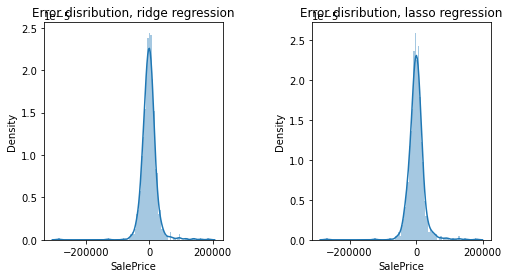

In [94]:
# Error distribution in train dataset - ridge and lasso
print('Error distribution in train dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [95]:
# Displaying the r2 score in train dataset for ridge and lasso
print('r2_score in train dataset')
print('r2_score for ridge:', round(metrics.r2_score(y_train, y_pred_ridge_train),2))
print('r2_score for lasso:', round(metrics.r2_score(y_train, y_pred_lasso_train),2))

r2_score in train dataset
r2_score for ridge: 0.89
r2_score for lasso: 0.9


In [96]:
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

Error distribution in test dataset


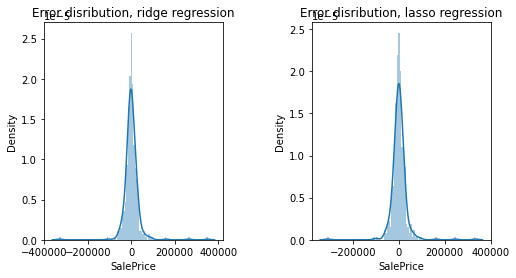

In [97]:
# Error distribution in test dataset - ridge and lasso
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [98]:
# Displaying the r2 score in test dataset for ridge and lasso
print('r2_score in test dataset:')
print('r2_score for ridge:', round(metrics.r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(metrics.r2_score(y_test, y_pred_lasso_test), 2))

r2_score in test dataset:
r2_score for ridge: 0.82
r2_score for lasso: 0.82


In [99]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 2) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff

[('constant', 154053.18),
 ('MSSubClass', -7589.82),
 ('LotFrontage', -3336.15),
 ('LotArea', 5852.44),
 ('OverallQual', 15256.85),
 ('OverallCond', 4790.49),
 ('YearBuilt', 4347.02),
 ('YearRemodAdd', 1965.57),
 ('MasVnrArea', 2037.23),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 80.25),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', -371.07),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 1003.73),
 ('GrLivArea', 23275.27),
 ('BsmtFullBath', 4684.57),
 ('BsmtHalfBath', -310.33),
 ('FullBath', 5354.96),
 ('HalfBath', 2821.0),
 ('BedroomAbvGr', -396.55),
 ('KitchenAbvGr', -3121.03),
 ('Fireplaces', 810.21),
 ('GarageCars', 8237.75),
 ('WoodDeckSF', 2946.28),
 ('OpenPorchSF', 118.74),
 ('EnclosedPorch', 822.31),
 ('3SsnPorch', -0.0),
 ('ScreenPorch', 2946.77),
 ('PoolArea', -3010.87),
 ('MiscVal', -271.14),
 ('MoSold', -642.84),
 ('YrSold', -114.8),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -4391.59),
 ('Street_Pave', 28968.3),
 ('LotShape_IR2', 5118.05),
 ('LotSh

In [100]:
# Identifying important features, excluding dummies
final_var_list = []
for i in list(housing_postdrop):
    for j in var_coeff:
        if i in j[0]:
            final_var_list.append(i)
            break
print(final_var_list)
print(len(final_var_list))

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
71


In [101]:
#variables with positive coefficients
pos_var = [x for x in var_coeff if x[-1] > 0]
final_var_pos = []
for i in list(housing):
    for j in pos_var:
        if i in j[0]:
            final_var_pos.append(i)
            break
print(final_var_pos)
print(len(final_var_pos))

['LotArea', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF2', 'Heating', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'Functional', 'Fireplaces', 'GarageType', 'GarageCars', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SaleType', 'SaleCondition']
41


In [102]:
#variables with negative coefficients
neg_var = [x for x in var_coeff if x[-1] < 0]
final_var_neg = []
for i in list(housing):
    for j in neg_var:
        if i in j[0]:
            final_var_neg.append(i)
            break
print(final_var_neg)
print(len(final_var_neg))

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotShape', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType']
36


### 4). Observation and inference

#### i). It's observed that the optimum value for alpha in ridge and lasso are 20 and 100 respectively
#### ii). It's observed that both Lasso and Ridge Regression techniques have almost similar r2 value
##### r2_score in train dataset: r2_score for ridge: 0.89, r2_score for lasso: 0.9 
##### r2_score in test dataset: r2_score for ridge: 0.82, r2_score for lasso: 0.82
#### iii). Highlighting negative parameters will help the company purchase houses below market value
### Hence, for Surprise Holding keeping a check on those predictors affecting the price of the house is crucial in making a buy or sell decision.